# Machine Learning for Public Policy - Homework 3

In [ ]:
### Héctor Salvador López
### Code for the pipeline was significantly inspired on:
### /rayidghani/magicloops/blob/master/magicloops.py
### /BridgitD/Machine-Learning-Pipeline/blob/master/pipeline.py
### /danilito19/CAPP-ML-dla/blob/master/pa3/workflow.py
### /ladyson/ml-for-public-policy/blob/master/PA3/pipeline.py
### /demunger/CAPP30254/blob/master/HW3/hw3.py
### /aldengolab/ML-basics/blob/master/pipeline/model.py

In [2]:
%matplotlib inline
import math
import pandas as pd
from pipeline import reading, explore, preprocess, features, classify
from sklearn.cross_validation import train_test_split

In [5]:
# define features and label for this dataset
filename = 'pipeline/data/cs-training.csv'
fts = ['RevolvingUtilizationOfUnsecuredLines', 
            'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 
            'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 
            'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
            'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

label = 'SeriousDlqin2yrs'

In [6]:
# read dataset
df = reading.read(filename)

In [13]:
# divide dataset to train and test
xtrain, xtest, ytrain, ytest = train_test_split(df[fts], df[label])
train = pd.concat([ytrain, xtrain], axis = 1)
test = pd.concat([ytest, xtest], axis = 1)
df = train

In [14]:
# generate statistics and generic exploration histograms
# explore.statistics_csv(df)
# explore.plots_csv(df)

In [15]:
# dive deeper into histograms

In [16]:
# impute null values with mean value and transform income to log(income)
preprocess.impute_csv(df)
preprocess.transform_feature(df, 'MonthlyIncome', lambda x: math.log(x + 1))
fts.append(df.keys()[-1])

0) SeriousDlqin2yrs has null values: False.
1) RevolvingUtilizationOfUnsecuredLines has null values: False.
2) age has null values: False.
3) NumberOfTime30-59DaysPastDueNotWorse has null values: False.
4) DebtRatio has null values: False.
5) MonthlyIncome has null values: False.
6) NumberOfOpenCreditLinesAndLoans has null values: False.
7) NumberOfTimes90DaysLate has null values: False.
8) NumberRealEstateLoansOrLines has null values: False.
9) NumberOfTime60-89DaysPastDueNotWorse has null values: False.
10) NumberOfDependents has null values: False.
11) f(MonthlyIncome) has null values: False.
12) bins_f(MonthlyIncome) has null values: False.


In [17]:
# create a feature of income quartile
features.binning(df, 'f(MonthlyIncome)', 'quantiles', [0, 0.25, 0.5, 0.75, 1])
fts.append(df.keys()[-1])

In [18]:
#models = ['LR', 'KNN', 'DT', 'SVM', 'RF', 'GB']
models = ['LR', 'DT', 'RF']

In [19]:
results, best_models = classify.classify(df[fts], df[label], models, 3, 0.05)

LR
Finished running LR
Best model was: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), with auc = 0.6314434558249972.

DT
Finished running DT
Best model was: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features='log2', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), with auc = 0.761380195609501.

RF
Finished running RF
Best model was: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
        

In [20]:
results


,time,avg_auc,params
LR,1.39334,0.631443,"{'C': 10, 'penalty': 'l2'}"
DT,0.123689,0.76138,"{'criterion': 'entropy', 'max_features': 'log2..."
RF,0.832267,0.779374,"{'max_features': 'log2', 'min_samples_split': ..."


In [21]:
best_models


{'DT': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
             max_features='log2', max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 'LR': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'RF': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=10, max_features='log2', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)}

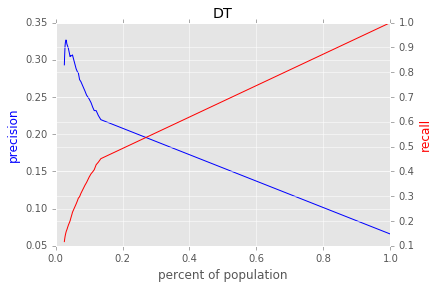

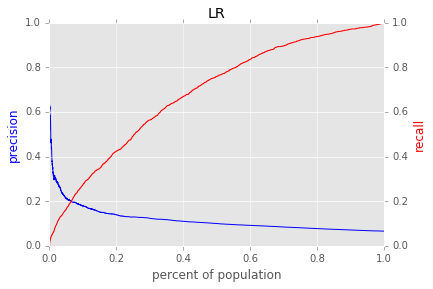

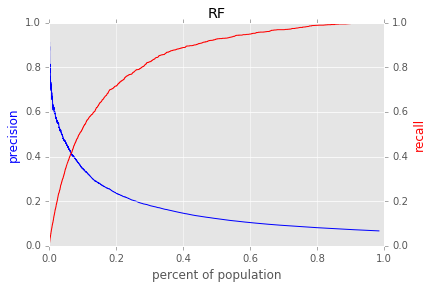

In [22]:
classify.gen_precision_recall_plots(df[fts], df[label], best_models)
